In [1]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#LOAD DATA
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)


In [3]:

#view first six rows of dataset
data[0:10]

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


In [4]:
#find total observations in dataset
len(data.index)

10000

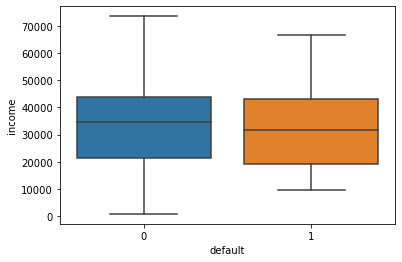

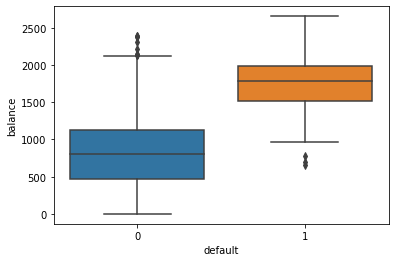

In [5]:
import seaborn as sns
sns.boxplot(x='default', y='income', data=data)
plt.show()
sns.boxplot(x='default', y='balance', data=data)
plt.show()

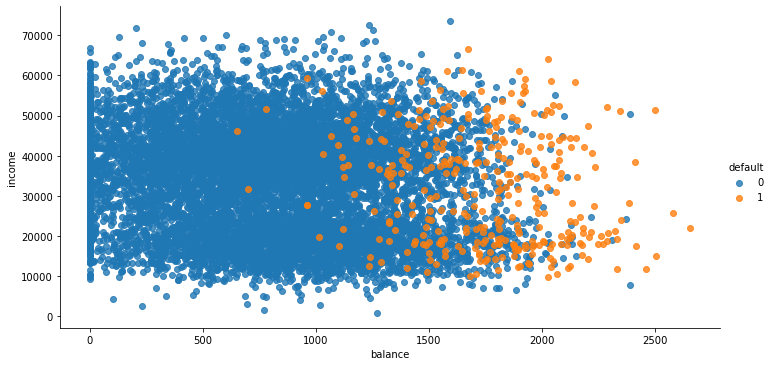

In [17]:
sns.lmplot(x='balance', y='income', hue = 'default', data=data, aspect=2, fit_reg = False)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='student', ylabel='balance'>

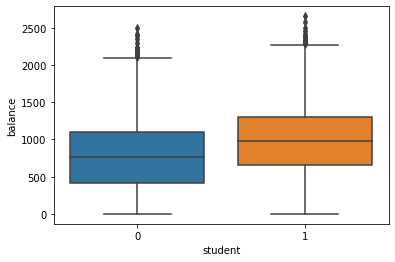

In [7]:
sns.boxplot('student', 'balance', data=data)

In [8]:
#FIT LOGISTIC REGRESSION MODEL
X = data[['student', 'balance','income']]
y = data['default']

In [9]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:

#instantiate the model
log_regression = LogisticRegression()

In [11]:

#fit the model using the training data
log_regression.fit(X_train,y_train)


LogisticRegression()

In [12]:

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [13]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[2870,   17],
       [  93,   20]], dtype=int64)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9633333333333334


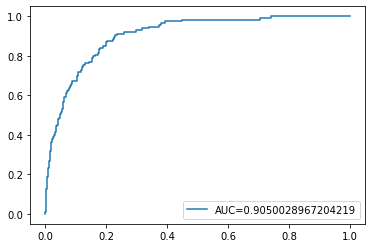

In [15]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
new_candidates = {'student': [0,0,0,1,0],
                  'balance': [1500,7000,50,6000,550],
                  'income': [2,25,50,6000,18000,]}

data2 = pd.DataFrame(new_candidates,columns= ['student', 'balance','income'])
y_pred=log_regression.predict(data2)

print (data2)
print (y_pred)

   student  balance  income
0        0     1500       2
1        0     7000      25
2        0       50      50
3        1     6000    6000
4        0      550   18000
[1 1 0 1 0]
